# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 3.3: Exemplos iniciais - Limiarização (thresholding)

In [47]:
import math as m
import numpy as np
import scipy.fftpack as spfft
from imageio import imread
import matplotlib.pyplot as plt
from ipywidgets import FloatLogSlider,Label,Layout, interactive, VBox, AppLayout

Consideraremos o esquema de compressão seguinte: dado $x\in\mathbb{R}^N$ e um parâmetro de limiarização $c\in[0,1]$,

> 1. $\text{compute}\ X=DFT(x)$
2. $\text{calcule}\ M=\max\{|X_k|,\ k=0,\ldots,N-1\}$
3. $\text{defina}\ \tilde{X}\in\mathbb{C}^N\ \text{como}$
    
$$\tilde{X}_k = \left\{\begin{array}{ll}
    X_k&\text{se}\ |X_k| > cM,\\
    0&\text{c.c.}\end{array}\right.$$

e para a descompressão:

> 4. $\text{calcule}\ \tilde{x} = IDFT(\tilde{X})$

### Duas medidas importantes relativas à compressão

**Razão de compressão:** percentual de componentes *preservadas* na limiarização
$$P(c) = \frac{\#\tilde{X}}{\#x} = \frac{ \#\{k: \text{ } |\tilde{X}_k| > 0\}}{N} = \frac{\#\{k: \text{ } |X_k| > cM\}}{N}.$$

**Perda de qualidade:** distância relativa em energia / variação relativa de energia
$$D(c) =  \frac{\lVert\textbf{x} - \tilde{\textbf{x}} \rVert^2}{\lVert\textbf{x}\rVert ^2}.$$ 

### Seção 3.3.1: Exemplo de compressão 1 - uma função contínua
 Gráfico da função $f(t)=(t-t^2)^2$ e sua DFT

In [48]:
# Função auxiliar para plotar uma função f(t) e seu espectro de energia, centralizado no 0
def plot_func_fft(t,f):
    N = len(t)
    F = np.fft.fft(f)
    F_power = 1/N * abs(F)
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('Sinal f(t)')
    ax[0].plot(t,f)
    ax[0].set_xlabel('tempo (s)')
    ax[0].set_ylabel('amplitude')
    ax[1].set_title('Espectro de Magnitude f(t) centrado em 0')
    ax[1].plot( np.arange(N) - N//2, np.roll(F_power, N//2) )
    ax[1].set_xlabel('bins')
    ax[1].set_ylabel('Energia')
    plt.show()

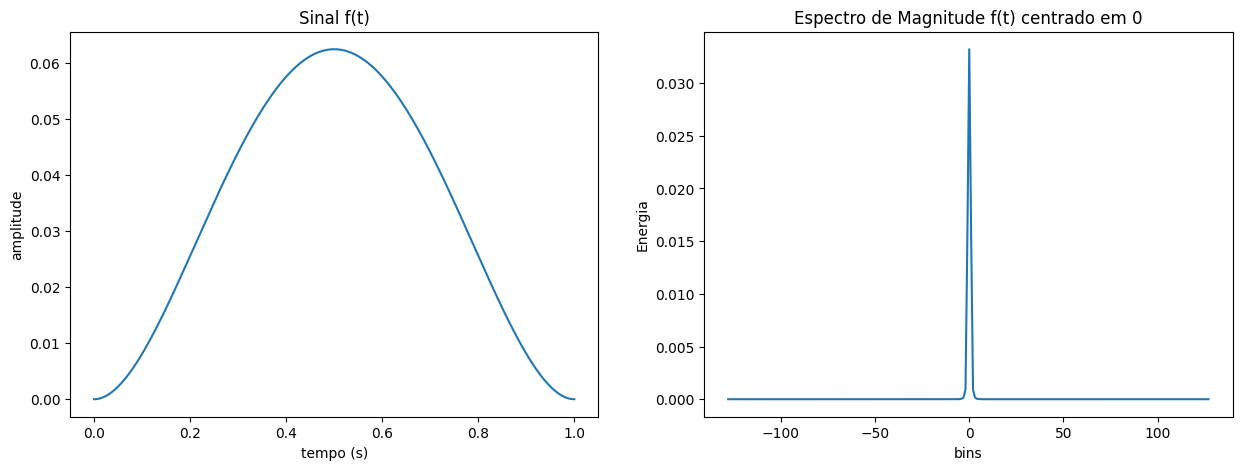

In [49]:
t = np.linspace(0, 1, 256)
f = (t - t**2)**2
plot_func_fft(t,f)

### Tabela 3.1: eficiência da compressão e distorção

In [50]:
# várias funções auxiliares...
def thresholding(f, c):
    F = np.fft.fft(f)
    M = max(abs(F))
    F_tilde = np.array([F_k if abs(F_k) > c*M else 0.0 for F_k in F])
    f_tilde = np.real(np.fft.ifft(F_tilde))
    return f_tilde, F_tilde

def compression(X_tilde):
    return np.count_nonzero(X_tilde)/len(X_tilde)

def distortion(f, f_tilde):
    return np.linalg.norm(f-f_tilde)**2 / np.linalg.norm(f)**2

def comp_dist_list(f,C):
    P = []
    D = []
    for c in C:
        f_tilde, F_tilde = thresholding(f, c)
        P += [compression(F_tilde)]
        D += [distortion(f, f_tilde)]
    return P, D

def plot_threshold(f, c_max=0.5):
    C = np.arange(0,c_max, 1/(100*c_max))
    P, D = comp_dist_list(f,C)
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(C, P, label='P(c)')
    ax[0].set_title(r"Compressão dos sinal em função de $c$")
    ax[0].set_xlabel("c")
    ax[0].set_ylabel("Compressão")
    ax[1].plot(C, D, label='D(c)')
    ax[1].set_title(r"Distorção dos sinal em função de $c$")
    ax[1].set_xlabel("c")
    ax[1].set_ylabel("Distorção")
    plt.show()

In [51]:
# C representa o conjunto de limiares para eliminação de coeficientes "pequenos" do espectro
C = [0.005, 0.01, 0.02, 0.03, 0.1, 0.5]
P, D = comp_dist_list(f, C)
print("c\tP(c)\t\tD(c)\n--------------------------------")
for i in range( len(C) ):
    print("%.3f\t%f\t%f" % (C[i], P[i], D[i]))

c	P(c)		D(c)
--------------------------------
0.005	0.027344	0.000003
0.010	0.019531	0.000040
0.020	0.019531	0.000040
0.030	0.011719	0.001128
0.100	0.011719	0.001128
0.500	0.003906	0.302734


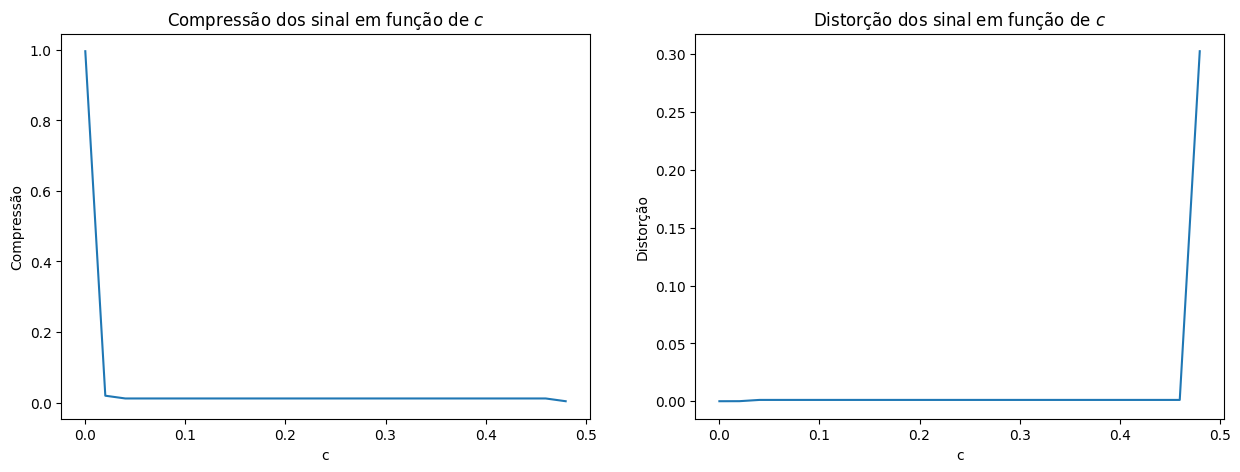

In [52]:
plot_threshold(f)

### Seção 3.3.2: Exemplo de compressão 2 - Função degrau e sua DFT

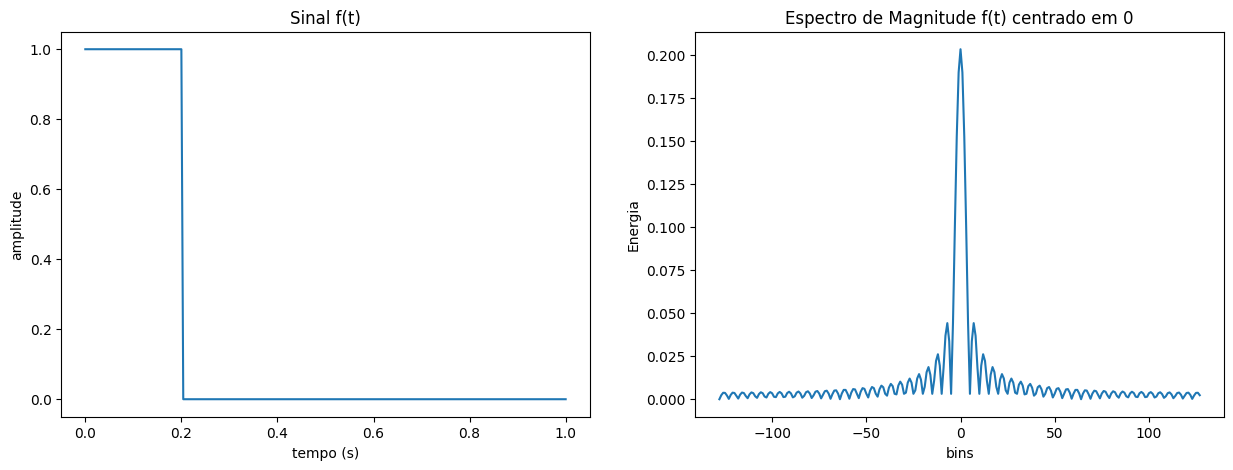

In [53]:
N = 256
t = np.linspace(0, 1, N)
f = np.zeros(N)
f[0 : int(np.floor(0.2 * N+1))] += 1
plot_func_fft(t,f)

### Tabela 3.2: compressão e distorção para o exemplo 2

In [54]:
C = [0.005, 0.01, 0.02, 0.03, 0.1, 0.5]
P, D = comp_dist_list(f, C)
print("c\tP(c)\t\tD(c)\n--------------------------------")
for i in range( len(C) ):
    print("%.3f\t%f\t%f" % (C[i], P[i], D[i]))

c	P(c)		D(c)
--------------------------------
0.005	0.894531	0.000051
0.010	0.800781	0.000348
0.020	0.425781	0.005373
0.030	0.261719	0.010458
0.100	0.074219	0.041532
0.500	0.019531	0.214407


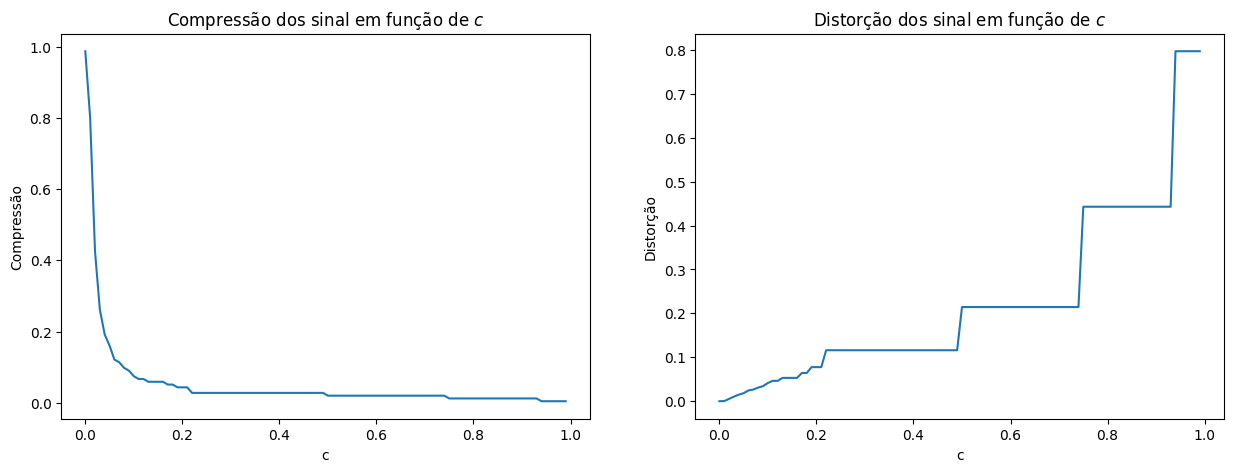

In [55]:
plot_threshold(f, c_max=1.0)

## Figura 3.5: Reconstrução da função usando compressão (iterativa)

In [56]:
c = FloatLogSlider(value=-3,base=10, min=-3,max=0,basestep=0.2, continuous_update=False, layout=Layout(width='95%'))
def plt_sampled_signal(c):
    N = 256
    t = np.linspace(0, 1, N)
    f = np.zeros(N)
    f[0 : int(np.floor(0.2 * N+1))] += 1
    f_tilde, F_tilde = thresholding(f, c)
    F = np.fft.fft(f)
    
    #plt.figure(figsize=(15,5))
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t, f, label='Original')
    ax[0].plot(t, f_tilde, label='Comprimido')
    ax[0].set_title('Forma de onda quadrada de 1Hz')
    ax[0].set_xlabel(f'tempo (s)\n\nRazão de Compressão: {compression(F_tilde)*100:.2f}%')
    ax[0].set_ylabel('amplitude')
    ax[1].plot( np.arange(N) - N//2, np.roll(abs(F)/N, N//2),label='Original')
    ax[1].plot(np.arange(N) - N//2, np.roll(abs(F_tilde)/N, N//2), label='Comprimido')
    ax[1].set_title('Espectro de magnitude')
    ax[1].set_xlabel(f'bins\n\nDistorção: {distortion(f,f_tilde)*100:.2f}%')
    ax[1].set_ylabel('amplitude')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [57]:
# Cria o ambiente interativo
w = interactive(plt_sampled_signal, c=c,)
display(VBox([w.children[1],  w.children[0]], layout=Layout(align_items='center')))
w.update()

## Seção 3.3.3: Exemplo de compressão 3 -  função identidade $(\;f(t)=t\;)$ e sua DFT

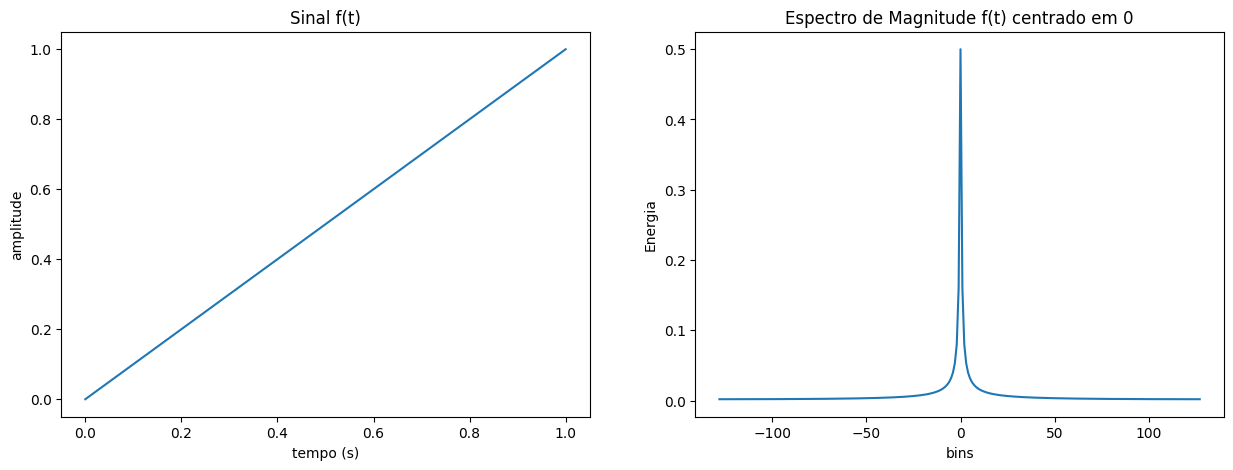

In [58]:
N = 256;
t = np.linspace(0, 1, N)
f = t
plot_func_fft(t,f)

## Tabela 3.3: compressão e distorção para $\ f(t)=t$

In [59]:
C = [0.005, 0.01, 0.02, 0.03, 0.1, 0.5]
P, D = comp_dist_list(f, C)
print("c\tP(c)\t\tD(c)\n--------------------------------")
for i in range( len(C) ):
    print("%.3f\t%f\t%f" % (C[i], P[i], D[i]))

c	P(c)		D(c)
--------------------------------
0.005	0.574219	0.001483
0.010	0.253906	0.004451
0.020	0.128906	0.009135
0.030	0.082031	0.014468
0.100	0.027344	0.043363
0.500	0.003906	0.251468


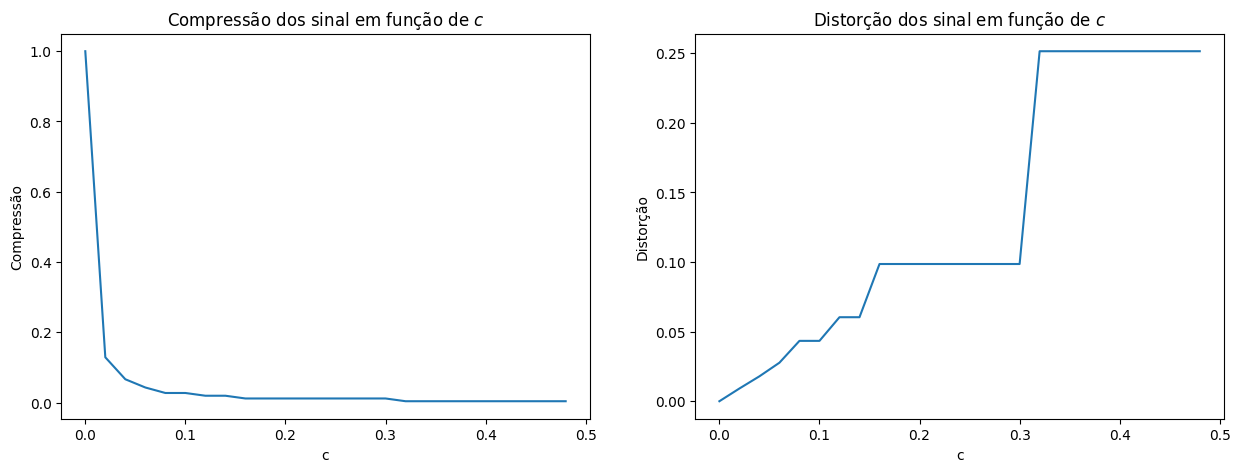

In [60]:
plot_threshold(f)

## Figura 3.6: Reconstrução da função usando compressão (iterativa)

In [61]:
c = FloatLogSlider(value=-3,base=10, min=-3,max=0,basestep=0.2, continuous_update=False, layout=Layout(width='95%'))
def plt_sampled_signal(c):
    N = 256
    t = np.linspace(0, 1, N)
    f = t
    f_tilde, F_tilde = thresholding(f, c)
    F = np.fft.fft(f)
    
    #plt.figure(figsize=(15,5))
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t, f, label='Original')
    ax[0].plot(t, f_tilde, label='Comprimido')
    ax[0].set_title('Forma de onda')
    ax[0].set_ylabel('amplitude')
    ax[0].set_xlabel(f'tempo (s)\n\nRazão de Compressão: {compression(F_tilde)*100:.2f}%')
    ax[0].set_ylabel('amplitude')
    ax[1].plot( np.arange(N) - N//2, np.roll(abs(F)/N, N//2),label='Original')
    ax[1].plot(np.arange(N) - N//2, np.roll(abs(F_tilde)/N, N//2), label='Comprimido')
    ax[1].set_title('Espectro de magnitude')
    ax[1].set_xlabel(f'bins\n\nDistorção: {distortion(f,f_tilde)*100:.2f}%')
    ax[1].set_ylabel('amplitude')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [62]:
# Cria o ambiente interativo
w = interactive(plt_sampled_signal, c=c,)
display(VBox([w.children[1], w.children[0]], layout=Layout(align_items='center')))
w.update()

## Figura 3.7: Usa o espectro original para sintetizar 3 períodos da forma de onda

Lembre-se que a equação de síntese

$$x_n=\frac{1}{N}\sum_{k=0}^{N-1}X_ke^{i2\pi kn/N}$$

pode ser usada $\forall n\in\mathbb{Z}$.

In [63]:
# a implementação abaixo cria um vetor 3 vezes maior e espaça
# os coeficientes do espectro original de 3 em 3,
# o que equivale a multiplicar a frequência fundamental por 3.
f_tilde, F_tilde = thresholding(f, 2.5e-2)
F = np.fft.fft(f)

F3_tilde = np.zeros(3 * N, dtype=complex)
F3_tilde[0 : 3*N : 3 ] = F_tilde
f3_tilde = np.real(np.fft.ifft(F3_tilde))
F3 = np.zeros(3 * N, dtype=complex)
F3[0 : 3*N : 3 ] = F
f3 = np.real(np.fft.ifft(F3))

def plota3períodos():
    plt.figure(figsize=(15,5))
    plt.plot(np.linspace(-1, 2, len(f3)), f3, label="Original")
    plt.plot(np.linspace(-1, 2, len(f3_tilde)), f3_tilde, label="Comprimido")
    plt.title('3 Períodos da forma de onda dente de serra comprimida')
    plt.xlabel('tempo (s)')
    plt.ylabel('amplitude')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

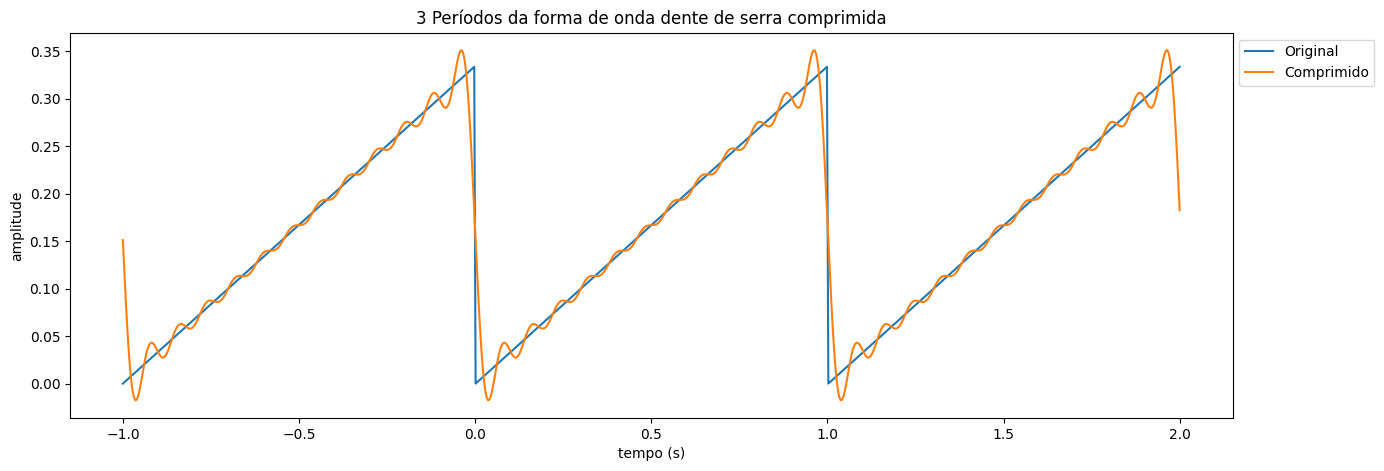

In [64]:
plota3períodos()

## Motivação para DCT: espelhamento da função original
#### essa operação elimina a descontinuidade na fronteira da janela

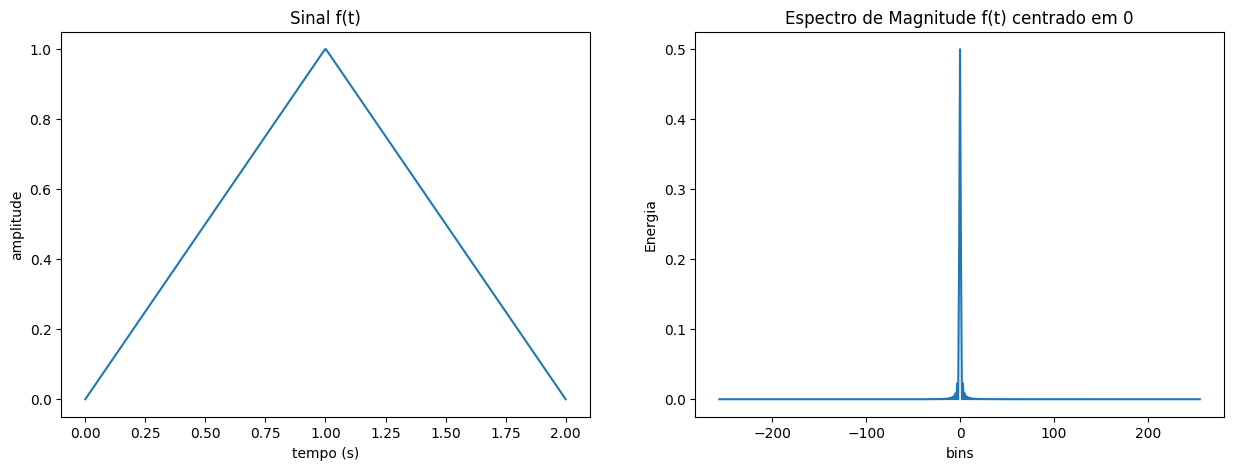

In [65]:
tt = np.linspace(0, 2 , 2*N)
ff = np.zeros(2*N)
ff[0:N] = f
ff[N:] = np.flip(f,0)
plot_func_fft(tt,ff)

## Reconstrução de $\;f(t)=t\;$ (espelhada) (versão iterativa)

In [66]:
c = FloatLogSlider(value=-3,base=10, min=-3,max=0,basestep=0.2, continuous_update=False, layout=Layout(width='95%'))
def plt_sampled_signal(c):
    N = 256
    t = np.linspace(0, 1, N)
    f = t
    f_tilde, F_tilde = thresholding(f, c)
    tt = np.linspace(0, 2 , 2*N)
    ff = np.zeros(2*N)
    ff[0:N] = f
    ff[N:] = np.flip(f,0)
    ff_tilde, FF_tilde = thresholding(ff, c)
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t, f, label='Original')
    ax[0].plot(t, f_tilde, label='Comprimido')
    ax[0].set_title('Reconstrução da função original')
    ax[0].set_ylabel('amplitude')
    ax[0].set_xlabel(f'tempo (s)\n\nRazão de Compressão (original): {compression(F_tilde)*100:.2f}%\nDistorção (original): {distortion(f,f_tilde)*100:.2f}%\n')
    ax[0].set_ylabel('amplitude')
    ax[1].plot(tt, ff, label='Original')
    ax[1].plot(tt, ff_tilde, label='Comprimido')
    ax[1].set_title('Reconstrução da função espelhada')
    ax[1].set_xlabel(f'bins\n\nRazão de Compressão (espelhada): {compression(FF_tilde)*100:.2f}%\nDistorção (espelhada): {distortion(ff,ff_tilde)*100:.2f}%')
    ax[1].set_ylabel('amplitude')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [67]:
# Cria o ambiente interativo
w = interactive(plt_sampled_signal, c=c,)
display(VBox([w.children[1], w.children[0]], layout=Layout(align_items='center')))
w.update()